In [1]:
import tellurium as te
import numpy as np

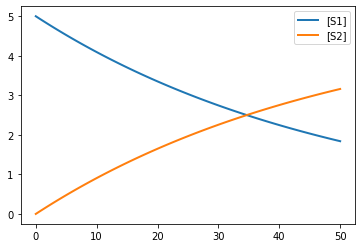

In [2]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.02; S1 = 5')
r.simulate(0, 50, 100)
r.plot()


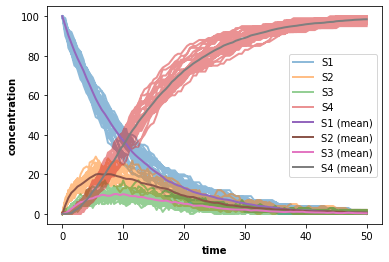

In [3]:
r = te.loada('''
    J1: S1 -> S2;  k1*S1;
    J2: S2 -> S3; k2*S2 - k3*S3
    # J2_1: S2 -> S3; k2*S2
    # J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# use a stochastic solver
r.integrator = 'gillespie'
r.integrator.seed = 1234
# selections specifies the output variables in a simulation
selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()
r.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points, selections=selections)
    s_sum += s
    # use show=False to add traces to the current plot
    # instead of starting a new one, equivalent to MATLAB hold on
    r.plot(s, alpha=0.5, show=False)

# add mean curve, legend, show everything and set labels, titels, ...
fig = te.plot(s[:,0], s_sum[:,1:]/Nsim, names=[x + ' (mean)' for x in selections[1:]], title="Stochastic simulation", xtitle="time", ytitle="concentration")